<h1 style="text-align:center;">Modeling of the Boltzmann distribution</h1> 
<p style="text-align:center; font-size:150%;"> A computer lab</p>

Reading:  P. Atkins, J. de Paula, R. Friedman, "Physical Chemistry. Quanta, Matter and Change" (2nd edition, 2014), Topics 51-54,59-60

**Introduction**

<p style='text-align: justify;  line-height: 1.4;'>The aim of this laboratory exercise is to illustrate by means of a simple model the appearance of the exponential Boltzmann distribution of populations of the energy levels, and to give, with this example, some insight into the fundamentals of statistical thermodynamics. We consider a model of N harmonic oscillators, which represent vibrational energy levels in a system of weakly interacting diatomic molecules (ideal diatomic gas), or vibrational modes in the Einstein model of crystals. The whole system is isolated, so that the total energy is kept constant, but energies of individual molecules are allowed to change randomly. One can see that with a sufficiently large number of molecules and after proper equilibration, the distribution over energy levels for individual molecules is consistent with the Boltzmann theory. Temperature, entropy, and other thermodynamic quantities may be determined from this distribution. Moreover, the second law of thermodynamics (the increase of entropy with time) can be illustrated.</p>

**Task 0**

Read through the theory and try to answer the following preparatory questions:

- In which chemical systems can we observe equal separation of energy levels?
- What is a microstate of a system?
- What is a configuration?
- Is it correct to say that different microstates always have different configurations?
- What can be said about the probabilities of different microstates in a system with conserved total energy?
- How can one determine the weight of a configuration?

**Task 1**

Familiarize yourself with the notebook. As a first, we need to import some helpful libraries, so just execute the next cell by clicking on it and pressing Ctrl+Enter.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import simbo_class as sc

The last line imports a module called <i>simbo_class</i>, which has all the functionalities we need to run a simulation. You will have the option to change the number of molecules (<i>number_of_molecules</i>), the average energy of molecules (<i>average_energy</i>) and the spacing of the energy levels $\nu$(<i>nu</i>). But for now, let's just use the default parameters, so click onto the next cell and execute it as before.

In [15]:
#user input
number_of_molecules = 10 
average_energy = 2 
nu = 500e2

#initialize
rs = sc.run_simbo(average_energy, number_of_molecules, nu)

Now we need to generate an initial state with the molecules distributed over the energy levels. You can either let <i>simbo_class</i> generate this state automatically and just execute the next cell

In [16]:
levels = sc.run_simbo.generate_levels(rs)

or you can define this state yourself by uncommenting the next line (i.e.removing the # sign at the beginning of the line), putting in your own values and executing the cell. But for now, let's skip that and go with the automatically generated state.

In [17]:
#levels = [12, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Ok, now let's run the simulation, just execute the next cell!

In [18]:
#run the simulation
(dist_sum, all_levels, all_distr, all_dist_sum, all_uav, all_wbolt, all_sw, all_sa, all_temp, max_level, 
     max_dist, max_distr_sum) = sc.run_simbo.run(rs, levels)

Now, all the data generated by the simulation is stored and you can look at it by running the next cell. It will show you an animation of the energy levels on the top left (which molecule occupies which energy level), the distribution of levels on the top right (how many molecules are in a certain energy level) and the average distribution of levels on the bottom left (on average, how many molecules have been in this energy level so far). The animation of the first two will start at a higher number, since there will be $20*N$ (N is the number of molecules) equilibration steps, where the average distribution is not counted and only afterwards run another $20*N$ steps where it is counted. 

It will also display some thermodynamic data on the bottom right. Here, you can choose if you want this data to be in default /Joule, Kelvin, etc.) or in reduced units by setting 'units' to either 'default' or 'reduced' (don't forget the quotation marks here or it will not work. You can also change the speed of the animation by changing 'time_per_step', as simulation with a lot of molecules tend to take longer.

<IPython.core.display.Javascript object>


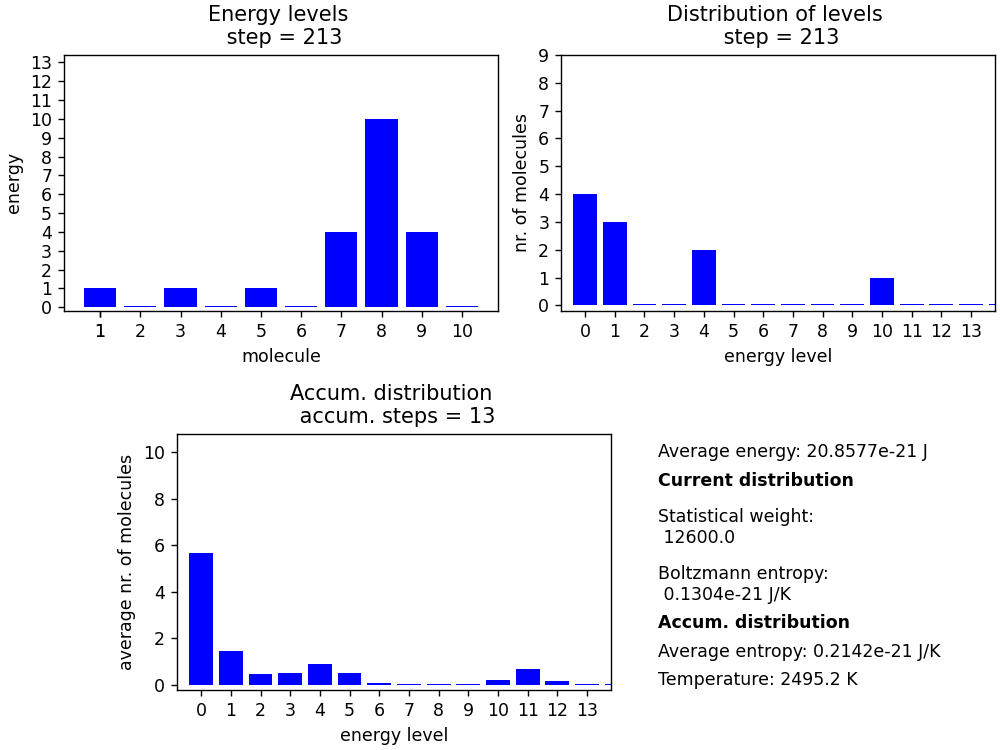

In [19]:
#animate plot data
%matplotlib notebook

time_per_step = 200
units = 'default'

fig, animation_frame, frames_no = sc.run_simbo.show(rs, all_levels, all_distr, all_dist_sum, all_uav, all_wbolt, 
                                                    all_sw, all_sa, all_temp, units)
animation = FuncAnimation(fig, animation_frame, frames=frames_no, interval=time_per_step, repeat=False)

All clear? Let's plot the Boltzmann distribution as well

<IPython.core.display.Javascript object>


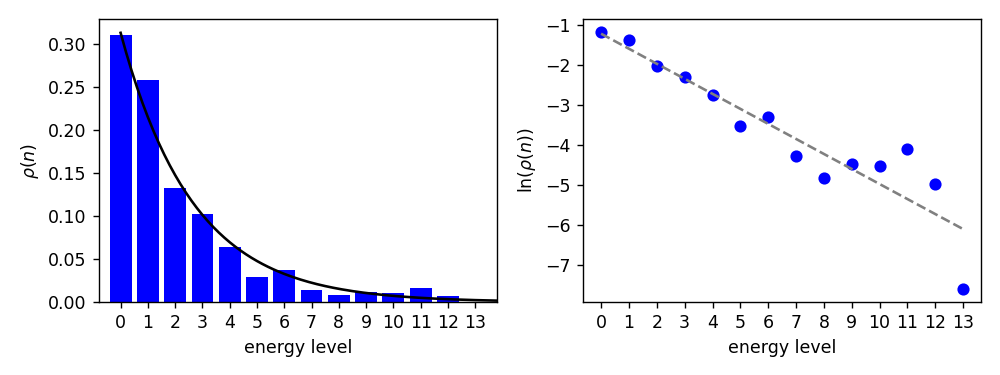

In [20]:
#plot Boltzmann distribution and temperature fit
ex = sc.extra_functions(average_energy, number_of_molecules, nu)
sc.extra_functions.plot_prob_temp(ex, dist_sum, max_level)

**Task 2**

something something

In [5]:
#task 6
start = 0
end = 10
units = 'default'

sc.extra_functions.print_w_sw(ex, all_wbolt, all_sw, start, end, units)#start at step 0, end at step 10

step 0	 W = 50400.0	 S_w = 0.1495e-21 J/K
step 1	 W = 37800.0	 S_w = 0.1455e-21 J/K
step 2	 W = 50400.0	 S_w = 0.1495e-21 J/K
step 3	 W = 50400.0	 S_w = 0.1495e-21 J/K
step 4	 W = 50400.0	 S_w = 0.1495e-21 J/K
step 5	 W = 25200.0	 S_w = 0.1399e-21 J/K
step 6	 W = 18900.0	 S_w = 0.1360e-21 J/K
step 7	 W = 12600.0	 S_w = 0.1304e-21 J/K
step 8	 W = 25200.0	 S_w = 0.1399e-21 J/K
step 9	 W = 15120.0	 S_w = 0.1329e-21 J/K


<IPython.core.display.Javascript object>


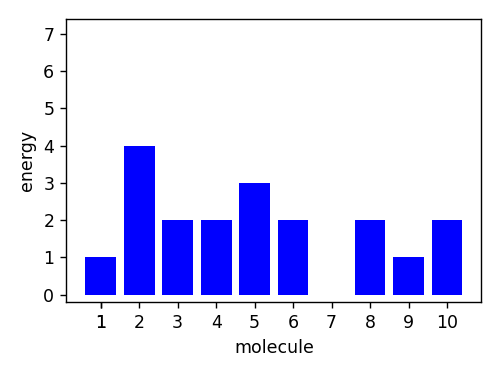

Statistical weight: 15120    Boltzmann entropy: 0.1329e-21 J/K


In [8]:
#task 7
number_of_molecules = 10
average_energy = 2
units = 'default'

sc.extra_functions.get_w_sw(ex, average_energy, number_of_molecules, units)